Role определяется в разделе Modify

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
 
%matplotlib inline
plt.style.use('ggplot')

### Missings

In [2]:
def findColumnsWithNan(d):
    features = list(d)
    containsMissings = []
    for i in range(0, d.shape[1]):
        if d.iloc[:, i].count() < d.shape[0]:
            containsMissings.append(features[i])
    return containsMissings

## DataFrame print settings

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 12)

# Sample

In [4]:
df = pd.read_csv('ABT_09_05_2017.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64",
                                    "role" : "object"
                               })

In [5]:
features = list(df)
target = 'win'

In [6]:
df

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,radiant,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,...,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30,role
0,0,94155156,18,Ranged,2.0,135,6.0,5,2,False,3572,362,302,14740,4343,10846,50,1,106,5157,Kiev Major,25,Dazzle,3149572447,0,int,True,1493579346,1.00342,1679.0,2354.0,2919.0,4165.0,5483.0,123.0,6844.0,587.0,1017.0,1645.0,2046.0,2415.0,3475.0,4265.0,229.0,5549.0,615.0,1117.0,12.0,17.0,19.0,22.0,29.0,2.0,33.0,4.0,5.0,2586976,366,True,454,3149572447_94155156,30.04.2017 22:09:06,NaN,NaN,NaN,NaN,NaN,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,8,4,4,0.4,0.333333,0.333333,0.30,0.32,0.333333,0.266667,0.8,0.500,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,Ranged,50,Dazzle,int,66.0,130.0,64.0,41.000000,117.4,127.125,167.9,196.166667,194.600000,208.25,219.32,228.133333,76.333333,123.0,139.625,164.5,170.500000,161.000000,173.75,170.60,184.966667,0.666667,0.8,0.625,1.2,1.416667,1.266667,1.10,1.16,1.100000,5.0
1,1,73562326,32,Ranged,0.0,137,0.0,5,1,False,3297,49,323,12505,11193,21146,50,8,54,5157,Kiev Major,24,Dazzle,3147569106,3,int,True,1493501955,2.03271,1431.0,2048.0,3762.0,5536.0,7301.0,212.0,8266.0,394.0,872.0,1557.0,2036.0,3040.0,4177.0,5085.0,182.0,5760.0,586.0,1216.0,7.0,13.0,24.0,24.0,29.0,0.0,29.0,2.0,3.0,39,722,True,472,3147569106_73562326,30.04.2017 00:39:15,NaN,749.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,0,0,0.0,0.083333,0.066667,0.10,0.12,0.000000,0.100000,0.0,0.000,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,Ranged,50,Dazzle,int,66.0,130.0,64.0,70.666667,78.8,109.000,143.1,170.666667,250.800000,276.80,292.04,275.533333,60.666667,117.2,152.000,155.7,169.666667,202.666667,208.85,203.40,192.000000,0.000000,0.4,0.375,0.7,1.083333,1.600000,1.20,1.16,0.966667,4.0
2,2,103735745,8,Ranged,1.0,134,3.0,8,5,True,2540,238,190,7365,2266,6609,50,0,46,5157,Kiev Major,14,Dazzle,3144980236,129,int,False,1493395003,0.00000,1650.0,2182.0,2781.0,3632.0,4765.0,222.0,6332.0,5

In [7]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [8]:
id_columns = [  'account_id',    
                'duration', 
                'hero_id',
                'leagueid',                          
                'leaguename',
                'match_id',
                'player_slot',
                'start_time',
                'team_id',
                'id_x',
                'datetime',
                'attack_type_y',
                'id_y',
                'localized_name_y',
                'primary_attr_y',
                'Unnamed: 0',   
                'role',
            ]
categorical_columns = [x for x in categorical_columns if x not in id_columns]
numerical_columns = [x for x in numerical_columns if x not in id_columns]

# EXPLORE

In [9]:
df[categorical_columns].describe()

,attack_type_x,cluster,dire,localized_name_x,primary_attr_x,radiant,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
count,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010
unique,2,27,2,111,3,2,2,2,2,2,2,2,2,2,2
top,Melee,224,False,Crystal Maiden,int,True,1,1,0,0,0,0,1,0,0
freq,2628,2539,2531,208,1785,2531,2505,3923,3220,2577,2554,4145,3463,4194,3177


In [10]:
for c in categorical_columns:
    print c,'= ',df[c].unique()

attack_type_x =  ['Ranged' 'Melee']
cluster =  ['135' '137' '134' '131' '138' '133' '224' '154' '202' '122' '121' '123'
 '201' '183' '155' '132' '187' '156' '152' '136' '184' '182' '181' '153'
 '151' '186' '188']
dire =  ['False' 'True']
localized_name_x =  ['Dazzle' 'Troll Warlord' 'Treant Protector' 'Centaur Warrunner'
 'Timbersaw' 'Warlock' 'Alchemist' 'Outworld Devourer' 'Legion Commander'
 'Enchantress' 'Ember Spirit' 'Earth Spirit' 'Enigma' 'Terrorblade'
 'Crystal Maiden' 'Juggernaut' 'Silencer' 'Magnus' 'Lifestealer'
 'Dragon Knight' 'Axe' 'Night Stalker' 'Phoenix' 'Storm Spirit'
 'Elder Titan' 'Medusa' 'Templar Assassin' 'Batrider' 'Spectre' 'Ursa'
 'Sand King' 'Invoker' 'Slark' 'Tusk' 'Rubick' 'Death Prophet' 'Io'
 'Queen of Pain' 'Riki' 'Sven' 'Disruptor' 'Vengeful Spirit' 'Omniknight'
 'Morphling' 'Spirit Breaker' 'Faceless Void' 'Venomancer' 'Puck'
 'Clockwerk' 'Lina' 'Abaddon' 'Lycan' 'Dark Seer' 'Slardar' 'Pugna'
 'Phantom Assassin' 'Visage' 'Tiny' 'Kunkka' 'Naga Siren' '

In [11]:
df[numerical_columns].describe()

C:\Program Files (x86)\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,t_sen_cnt_30,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
count,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,4962.000000,5010.000000,4637.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,4962.000000,5010.000000,4637.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,4962.00000,5010.000000,4637.000000,5010.000000,5010.000000,5010.000000,5010.000000,64.000000,1063.000000,591.000000,192.000000,1816.000000,4783.000000,777.000000,246.000000,92.000000,698.000000,919.000000,211.000000,337.000000,2543.000000,445.000000,966.000000,857.000000,807.000000,86.000000,199.000000,1278.000000,520.000000,370.000000,1359.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,...,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.0,5010.000000,5010.0,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.0,5010.000000,5010.0,5010.000000,5004.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,4962.000000,4637.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,4962.000000,4637.000000

In [12]:
df[numerical_columns].corr()

,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,win,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
assists,1.000000,0.034997,0.026249,0.074464,-0.147428,-0.069468,0.008436,0.183080,0.231583,0.223302,0.129546,-0.008545,0.389791,0.283755,-0.180487,-0.177817,-0.167458,-0.132372,-0.072515,-0.166473,-0.035074,-0.175905,-0.178668,-0.185265,-0.190837,-0.194802,-0.182690,-0.162230,-0.172683,-0.147550,-0.177789,-0.179167,-0.220480,-0.227699,-0.237191,-0.238865,-0.234240,-0.188334,-0.236980,-0.197331,-0.212157,0.032599,0.495267,0.139932,0.236993,0.078187,0.102526,0.017626,0.041363,0.021958,-0.077295,0.118659,0.097393,0.214527,0.242904,0.130961,0.220310,0.083729,0.176959,0.047750,0.106922,0.146055,0.185478,0.173364,-0.046385,-0.064121,0.118415,0.071939,0.042964,0.132451,0.135505,0.136599,0.133785,0.132614,0.093838,...,0.169631,0.170151,0.179596,0.178534,0.180655,0.148211,0.188629,0.144206,0.170416,0.068888,0.056539,0.036023,0.038366,0.053655,-0.005568,0.082844,0.072037,0.083413,0.068888,0.056539,0.036023,0.038366,0.053655,-0.005568,0.082844,0.072037,0.083413,0.013408,-0.002923,0.021087,0.001167,-0.041932,NaN,-0.109659,NaN,0.013408,0.013408,-0.002923,0.021087,0.001167,-0.041932,NaN,-0.109659,NaN,0.013408,-0.072831,0.043065,0.040731,-0.166473,-0.175905,-0.178668,-0.180487,-0.177817,-0.167458,-0.132372,-0.072515,-0.035074,-0.172683,-0.177789,-0.179167,-0.185265,-0.190837,-0.194802,-0.182690,-0.162230,-0.147550,-0.188334,-0.197331,-0.212157,-0.220480,-0.227699,-0.237191,-0.238865,-0.234240,-0.236980
camps_stacked,0.034997,1.000000,0.950379,0.038392,-0.186651,0.062527,-0.086360,-0.048647,-0.072504,0.140082,-0.117871,-0.080899,-0.078201,-0.046474,-0.152821,-0.135633,-0.130425,-0.128600,-0.122822,-0.126006,-0.135351,-0.143774,-0.151827,-0.136886,-0.127477

# Modify

# By mid role

In [13]:
df = df[df['role'] == '2.0']

In [14]:
df

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,radiant,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,...,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30,role
72,76,311360822,10,Ranged,1.0,135,2.0,4,1,False,3572,362,696,37010,30318,685,95,8,489,5157,Kiev Major,25,Troll Warlord,3149572447,1,agi,True,1493579346,12.56260,2953.0,4156.0,5759.0,8373.0,12027.0,515.0,16603.0,948.0,2147.0,2468.0,3575.0,5025.0,7818.0,10948.0,475.0,15698.0,899.0,1607.0,35.0,50.0,76.0,108.0,163.0,5.0,232.0,12.0,23.0,2586976,15885,True,617,3149572447_311360822,30.04.2017 22:09:06,NaN,NaN,1567.0,NaN,NaN,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9,1,1,0.1,0.166667,0.200000,0.20,0.28,0.333333,0.300000,0.2,0.125,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,1,1,1,0,0,0,0,1,0,Ranged,95,Troll Warlord,agi,132.0,138.0,75.0,171.666667,189.6,268.375,295.3,346.333333,383.933333,418.65,481.08,553.433333,158.333333,179.8,200.875,246.8,297.916667,335.000000,390.90,437.92,523.266667,1.666667,2.4,2.875,3.5,4.166667,5.066667,5.40,6.52,7.733333,2.0
73,77,85937380,4,Ranged,0.0,133,0.0,7,25,False,1747,4,451,11320,4981,0,95,3,214,5157,Kiev Major,17,Troll Warlord,3145229865,3,agi,True,1493404176,1.26780,3419.0,4485.0,5728.0,8538.0,11116.0,412.0,12958.0,1195.0,2443.0,3187.0,4112.0,5143.0,8261.0,10807.0,538.0,12936.0,1224.0,2207.0,52.0,75.0,88.0,129.0,175.0,9.0,209.0,22.0,41.0,3580606,695,False,447,3145229865_85937380,28.04.2017 21:29:36,NaN,NaN,NaN,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0.0,0.000000,0.000000,0.05,0.04,0.000000,0.033333,0.0,0.000,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,1,1,1,0,0,0,0,1,0,Ranged,95,Troll Warlord,agi,132.0,138.0,75.0,137.333333,239.0,305.375,341.9,373.750000,381.866667,426.90,444.64,431.933333,179.333333,244.8,275.875,318.7,342.666667,342.866667,413.05,432.28,431.200000,3.000000,4.4,5.125,5.2,6.250000,5.866667,6.45,7.00,6.966667,2.0
81,85,111620041,7,Ranged,0.0,132,0.0,8,8,True,2591,0,487,18980,23136,0,95,4,303,5157,Kiev Major,21,Troll Warlord,3137325

## Binarization

In [15]:
df_dummies = pd.get_dummies(df[categorical_columns])
binary_columns = list(df_dummies)

In [16]:
df = pd.concat([df, df_dummies], axis = 1)

## Heroes Popularity

In [17]:
heroPopularity = dict()
heroPopularityList = []
for f in list(df):
    popularity = 0
    if f.find('localized_name_') != -1 and f != 'localized_name_x' and f != 'localized_name_y':
        popularity = df[f].sum()
        heroPopularity[f] = popularity
from operator import itemgetter
heroPopularityList = sorted(heroPopularity.items(), key=itemgetter(1), reverse=True)

In [18]:
heroPopularityList

[('localized_name_x_Lina', 122.0),
 ('localized_name_x_Ember Spirit', 110.0),
 ('localized_name_x_Invoker', 100.0),
 ('localized_name_x_Shadow Fiend', 79.0),
 ('localized_name_x_Alchemist', 55.0),
 ('localized_name_x_Templar Assassin', 52.0),
 ('localized_name_x_Storm Spirit', 50.0),
 ('localized_name_x_Outworld Devourer', 45.0),
 ('localized_name_x_Juggernaut', 43.0),
 ('localized_name_x_Tinker', 34.0),
 ('localized_name_x_Sniper', 31.0),
 ('localized_name_x_Puck', 24.0),
 ('localized_name_x_Silencer', 22.0),
 ('localized_name_x_Timbersaw', 18.0),
 ('localized_name_x_Legion Commander', 18.0),
 ('localized_name_x_Lifestealer', 17.0),
 ('localized_name_x_Dragon Knight', 16.0),
 ('localized_name_x_Troll Warlord', 14.0),
 ('localized_name_x_Vengeful Spirit', 14.0),
 ('localized_name_x_Terrorblade', 14.0),
 ('localized_name_x_Queen of Pain', 13.0),
 ('localized_name_x_Phantom Assassin', 13.0),
 ('localized_name_x_Ursa', 12.0),
 ('localized_name_x_Medusa', 12.0),
 ('localized_name_x_Lone Dr

## Missings

In [19]:
NanColumns = findColumnsWithNan(df)

In [20]:
NanColumns

['t_experience_cnt_25',
 't_experience_cnt_30',
 't_gold_cnt_25',
 't_gold_cnt_30',
 't_lasthits_cnt_25',
 't_lasthits_cnt_30',
 't_item_aether_lens',
 't_item_arcane_boots',
 't_item_black_king_bar',
 't_item_blade_mail',
 't_item_blink',
 't_item_boots',
 't_item_bottle',
 't_item_desolator',
 't_item_echo_sabre',
 't_item_force_staff',
 't_item_hand_of_midas',
 't_item_hurricane_pike',
 't_item_invis_sword',
 't_item_magic_wand',
 't_item_manta',
 't_item_phase_boots',
 't_item_power_treads',
 't_item_ring_of_aquila',
 't_item_silver_edge',
 't_item_sphere',
 't_item_tranquil_boots',
 't_item_travel_boots',
 't_item_ultimate_scepter',
 't_item_wind_lace',
 't_experience_rpm_25',
 't_experience_rpm_30',
 't_gold_rpm_25',
 't_gold_rpm_30',
 't_lasthits_rpm_25',
 't_lasthits_rpm_30']

In [21]:
df = df.fillna(df.mean())

In [22]:
findColumnsWithNan(df)

[]

In [23]:
df = df[~df['role'].apply(lambda x: math.isnan(float(x)))]

In [24]:
findColumnsWithNan(df)

[]

## Data Partition

In [25]:
if target in categorical_columns:
    categorical_columns.remove(target)
    print "Removed from categorical"
if target in numerical_columns:
    numerical_columns.remove(target)
    print "Removed from numerical"
if target in binary_columns:
    binary_columns.remove(target)
    print "Removed from numerical"

Removed from numerical


In [26]:
X = pd.concat([df[numerical_columns], df[binary_columns]], axis = 1)
y = df[target]

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print N_train, N_test

760 327


C:\Program Files (x86)\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Drop List

In [28]:
clusterVars = []
for f in list(X_train):
    if f.find('cluster') != -1:
        clusterVars.append(f)
clusterVars

['cluster_121',
 'cluster_122',
 'cluster_123',
 'cluster_131',
 'cluster_132',
 'cluster_133',
 'cluster_134',
 'cluster_135',
 'cluster_136',
 'cluster_137',
 'cluster_138',
 'cluster_151',
 'cluster_152',
 'cluster_153',
 'cluster_154',
 'cluster_155',
 'cluster_156',
 'cluster_181',
 'cluster_182',
 'cluster_183',
 'cluster_184',
 'cluster_186',
 'cluster_187',
 'cluster_188',
 'cluster_201',
 'cluster_202',
 'cluster_224']

## Normalization [0,1]

In [29]:
X_train_norm = X_train[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X_test_norm = X_test[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [30]:
X_train_norm = pd.concat([X_train[binary_columns], X_train_norm], axis = 1)
X_test_norm = pd.concat([X_test[binary_columns], X_test_norm], axis = 1)
print X_train_norm.shape, X_test_norm.shape

(760, 288) (327, 288)


In [31]:
trainColumnsWithNan = findColumnsWithNan(X_train_norm)
testColumnsWithNan = findColumnsWithNan(X_test_norm)
ColumnsWithNan = trainColumnsWithNan
for col in testColumnsWithNan:
    if col not in trainColumnsWithNan:
        ColumnsWithNan.append(col)
print ColumnsWithNan

['t_buyback_cnt_10', 't_buyback_cnt_3', 't_buyback_cnt_5', 't_buyback_cnt_8', 't_buyback_rpm_10', 't_buyback_rpm_3', 't_buyback_rpm_5', 't_buyback_rpm_8', 't_buyback_cnt_12', 't_buyback_cnt_15', 't_buyback_rpm_12', 't_buyback_rpm_15']


In [32]:
X_train_norm = X_train_norm.drop(ColumnsWithNan, axis = 1)
X_test_norm = X_test_norm.drop(ColumnsWithNan, axis = 1)

## Outliers detection

In [33]:
from sklearn.ensemble import IsolationForest

isNotOutlier = IsolationForest(contamination = 0.01)
isNotOutlier.fit(X_train_norm)

IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [34]:
X_train_norm_filtered = X_train_norm[isNotOutlier.predict(X_train_norm) == 1]
y_train_filtered = y_train[isNotOutlier.predict(X_train_norm) == 1]

In [35]:
print X_train_norm_filtered.shape, y_train_filtered.shape

(752, 276) (752L,)


# Model

## Regression

In [36]:
X_train_norm_filtered.drop(clusterVars, axis = 1, inplace = True)
X_test_norm.drop(clusterVars, axis = 1, inplace = True)

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm = LogisticRegression(penalty = 'l1', C = 1, fit_intercept=False)
lm.fit(X_train_norm_filtered, y_train_filtered)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Assess

In [38]:
X_train_norm_filtered.shape, X_test_norm.shape

((752, 249), (327, 249))

In [39]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test accuracy = %s" %metrics.accuracy_score(y_test, lm.predict(X_test_norm))

print "Train AUC = %s" %metrics.roc_auc_score(y_train_filtered, lm.predict_proba(X_train_norm_filtered)[:,1])
print "Test AUC = %s" %metrics.roc_auc_score(y_test, lm.predict_proba(X_test_norm)[:,1])

print "Train Recall = %s" %metrics.recall_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Recall = %s" %metrics.recall_score(y_test, lm.predict(X_test_norm))

print "Train Precision = %s" %metrics.precision_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Precision = %s" %metrics.precision_score(y_test, lm.predict(X_test_norm))

Train accuracy = 0.949468085106
Test accuracy = 0.810397553517
Train AUC = 0.984405914264
Test AUC = 0.977103821034
Train Recall = 0.949367088608
Test Recall = 0.993506493506
Train Precision = 0.954198473282
Test Precision = 0.714953271028


In [40]:
from sklearn.model_selection import cross_val_score
print "CV F1 = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='f1_macro').mean()
print "CV accuracy = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='accuracy').mean()
print "CV AUC = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='roc_auc').mean()
print "CV Recall = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='recall').mean()
print "CV Precision = %s" %cross_val_score(lm, pd.concat([X_train_norm_filtered, X_test_norm]), pd.concat([y_train_filtered, y_test]), cv=5, scoring='precision').mean()

CV F1 = 0.926714109939
CV accuracy = 0.925857019811
CV AUC = 0.972679276756
CV Recall = 0.928940783987
CV Precision = 0.926702719395


In [41]:
try:
    del importanceLM
except Exception:
    print 'importanceLM does not exists'
importanceLM = dict()
for i in range(lm.coef_.shape[1]):
    importanceLM[list(X_train_norm_filtered)[i]] = lm.coef_.tolist()[0][i]
from operator import itemgetter
featureImportanceLM = sorted(importanceLM.items(), key=itemgetter(1), reverse=True)
print 'importanceLM has been created'

importanceLM does not exists
importanceLM has been created


In [42]:
featureImportanceLM

[('gold_per_min', 16.967241015568774),
 ('assists', 8.581345389886915),
 ('tower_damage', 6.347039723596656),
 ('kills', 3.1843823822027906),
 ('localized_name_x_Legion Commander', 1.167933877643803),
 ('primary_attr_x_int', 1.123173884342622),
 ('localized_name_x_Ember Spirit', 0.7847322032763442),
 ('localized_name_x_Storm Spirit', 0.607080605310982),
 ('pro_win', 0.5538292146275544),
 ('localized_name_x_Tinker', 0.39798579898868),
 ('t_item_blink', 0.31901233233563114),
 ('localized_name_x_Timbersaw', 0.21222006789213754),
 ('localized_name_x_Lifestealer', 0.0),
 ('t_lasthits_rpm_8', 0.0),
 ('dire_False', 0.0),
 ('localized_name_x_Zeus', 0.0),
 ('localized_name_x_Skywrath Mage', 0.0),
 ('t_experience_cnt_3', 0.0),
 ('t_experience_rpm_3', 0.0),
 ('localized_name_x_Tiny', 0.0),
 ('t_obs_rpm_30', 0.0),
 ('t_item_silver_edge', 0.0),
 ('t_item_black_king_bar', 0.0),
 ('localized_name_x_Silencer', 0.0),
 ('localized_name_x_Axe', 0.0),
 ('t_runes_rpm_8', 0.0),
 ('t_sen_cnt_8', 0.0),
 ('loc

In [43]:
heroImportanceLM = []
heroDict = {}
for i in range(len(featureImportanceLM)):
    if featureImportanceLM[i][0].find('localized_name_x') != -1:
        heroDict[featureImportanceLM[i][0]] = featureImportanceLM[i][1]
heroImportanceLM = sorted(heroDict.items(), key=itemgetter(1), reverse=True)        

In [44]:
heroImportanceLM

[('localized_name_x_Legion Commander', 1.167933877643803),
 ('localized_name_x_Ember Spirit', 0.7847322032763442),
 ('localized_name_x_Storm Spirit', 0.607080605310982),
 ('localized_name_x_Tinker', 0.39798579898868),
 ('localized_name_x_Timbersaw', 0.21222006789213754),
 ('localized_name_x_Lifestealer', 0.0),
 ('localized_name_x_Sven', 0.0),
 ('localized_name_x_Faceless Void', 0.0),
 ('localized_name_x_Naga Siren', 0.0),
 ('localized_name_x_Zeus', 0.0),
 ('localized_name_x_Skywrath Mage', 0.0),
 ('localized_name_x_Medusa', 0.0),
 ('localized_name_x_Juggernaut', 0.0),
 ('localized_name_x_Troll Warlord', 0.0),
 ('localized_name_x_Ogre Magi', 0.0),
 ('localized_name_x_Tiny', 0.0),
 ('localized_name_x_Ursa', 0.0),
 ('localized_name_x_Death Prophet', 0.0),
 ('localized_name_x_Silencer', 0.0),
 ('localized_name_x_Axe', 0.0),
 ('localized_name_x_Vengeful Spirit', 0.0),
 ('localized_name_x_Lone Druid', 0.0),
 ('localized_name_x_Morphling', 0.0),
 ('localized_name_x_Sand King', 0.0),
 ('locali

# Scoring

In [45]:
sdf = pd.read_csv('ABT_09_05_2017.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64",
                                    "role" : "object"
                               })

sdf = sdf[sdf['role'] == '2.0']
sdfIndex = sdf.index.values
sdf_dummies = pd.get_dummies(sdf[categorical_columns])
binary_columns = list(sdf_dummies)
sdf = pd.concat([sdf, sdf_dummies], axis = 1)
sdf = sdf.fillna(sdf.mean())
print findColumnsWithNan(sdf)
sdf = sdf[~sdf['role'].apply(lambda x: math.isnan(float(x)))]
print findColumnsWithNan(sdf)
sdf_norm = sdf[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
sdf_norm = pd.concat([sdf[binary_columns], sdf_norm], axis = 1)
sdf_norm = sdf_norm.drop(ColumnsWithNan, axis = 1)
print sdf_norm.shape
score = pd.DataFrame(index = sdfIndex) 
prediction = lm.predict(sdf_norm[list(X_train_norm_filtered)])
win_prob = lm.predict_proba(sdf_norm[list(X_train_norm_filtered)])[:,1]
score['prediction'] = prediction
score['win_prob'] = win_prob
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Scored accuracy = %s" %metrics.accuracy_score(sdf['win'], prediction)

[]
[]
(1087, 276)
Train accuracy = 0.949468085106
Scored accuracy = 0.882244710212


In [46]:
matches = pd.concat([sdf, score], axis = 1)
scoredMatches = matches[['account_id', 'match_id', 'team_id', 'role','datetime', 'win', 'win_prob', 'prediction']]
isCorrect = np.where((scoredMatches['win'] == scoredMatches['prediction']), True, False)
scoredMatches['isCorrect'] = isCorrect

C:\Program Files (x86)\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
scoredMatches

,account_id,match_id,team_id,role,datetime,win,win_prob,prediction,isCorrect
72,311360822,3149572447,2586976,2.0,30.04.2017 22:09:06,True,0.997699,True,True
73,85937380,3145229865,3580606,2.0,28.04.2017 21:29:36,False,0.080032,False,True
81,111620041,3137325049,39,2.0,24.04.2017 12:42:22,False,0.037097,False,True
87,205813150,3103296626,5,2.0,07.04.2017 13:58:42,True,0.939243,True,True
88,168028715,3101519863,2626685,2.0,06.04.2017 15:36:45,False,0.883181,True,False
103,205813150,3072575087,5,2.0,23.03.2017 14:20:15,True,0.998626,True,True
...,...,...,...,...,...,...,...,...,...
4993,85937380,3051844059,3580606,2.0,12.03.2017 22:45:13,True,0.993508,True,True
4995,86799300,3049073093,3722485,2.0,11.03.2017 18:59:40,False,0.193466,False,True
5000,87285329,3047026684,36,2.0,10.03.2017 21:25:24,False,0.097950,False,True


In [48]:
# scoredMatches.to_csv('ScoresByRole_2.csv', na_rep = 'NaN', sep = ';')

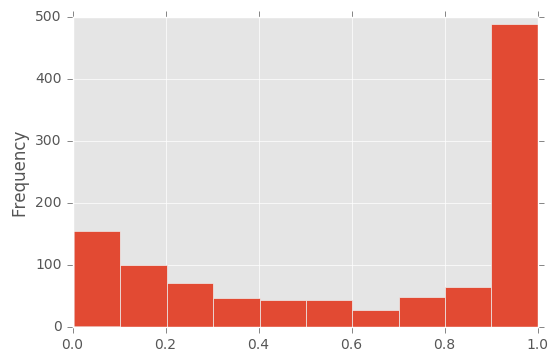

In [49]:
scoredMatches['win_prob'].plot(kind = 'hist')